# Regression Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, plot_confusion_matrix, f1_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

**Importing Dataset**

In [2]:
cookies = pd.read_csv('../Data/cookies_clean.csv')

In [3]:
cookies_v2 = pd.read_csv('../Data/cookies_less_cleaned.csv')

In [4]:
cookies.head(3)

Unnamed: 0  sugar to flour ratio  sugar index  bake temp  chill time  \
0           0                  0.25          9.5        300        15.0   
1           1                  0.23          3.3        520        34.0   
2           2                  0.18          1.9        360        33.0   

   calories    pH  grams baking soda  bake time  quality  butter type  \
0     136.0  8.10               0.44       12.1        8            1   
1     113.0  8.16               0.48        8.4        7            1   
2     106.0  8.21               0.83       14.0        9            1   

   chocolate  raisins  oats  nuts  peanut butter  
0          0        1     0     0              0  
1          0        1     0     0              0  
2          1        0     0     1              0

In [5]:
cookies.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
cookies_v2.drop('Unnamed: 0', axis=1, inplace=True)

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_scale, y_train)

y_pred = reg.predict(X_test_scale)
y_test_predict= reg.predict(X_test)

print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.656
RMSE: 0.7475095017588865


# Lasso Regression

In [8]:
from sklearn import linear_model

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(X_train_scale, y_train) 

pred_test_lasso= model_lasso.predict(X_test_scale)
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R2 Score:', r2_score(y_test, pred_test_lasso))

RMSE: 0.7820007886335753
R2 Score: 0.6234786353130868


In [11]:
from sklearn import linear_model

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(X_train_scale, y_train) 

pred_test_lasso= model_lasso.predict(X_test_scale)
print('MSE:', mean_squared_error(y_test,pred_test_lasso)) 
print('R2 Score:', r2_score(y_test, pred_test_lasso))

MSE: 0.794898662573316
R2 Score: 0.5105740321714269


# Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

rr = Ridge(alpha=0.01)
rr.fit(X_train_scale, y_train) 

pred_test_rr= rr.predict(X_test_scale)
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2 Score:', r2_score(y_test, pred_test_rr))

RMSE: 0.7475093214047426
R2 Score: 0.6559603736288399


In [13]:
from sklearn.linear_model import Ridge

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

rr = Ridge(alpha=0.01)
rr.fit(X_train_scale, y_train) 

pred_test_rr= rr.predict(X_test_scale)
print('MSE:', np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2 Score:', r2_score(y_test, pred_test_rr))

MSE: 0.7475083399629819
R2 Score: 0.6559612770413468


# ElasticNet Regression

In [14]:
from sklearn.linear_model import ElasticNet

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train_scale, y_train) 

pred_test_model_enet= model_enet.predict(X_test_scale)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_test_model_enet))) 
print('R2 Score:', r2_score(y_test, pred_test_model_enet))

RMSE: 0.7478854902098094
R2 Score: 0.6556140246679207


In [15]:
from sklearn.linear_model import ElasticNet

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train_scale, y_train) 


pred_test_enet= rr.predict(X_test_scale)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_test_enet))) 
print('R2 Score:', r2_score(y_test, pred_test_enet))

RMSE: 0.7475083399629819
R2 Score: 0.6559612770413468


# Random Forests Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

RFR = RandomForestRegressor(max_depth=15)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_train)
y_test_pred= RFR.predict(X_test)

print('R2 Score', r2_score(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 Score 0.7468395077238419
RMSE: 0.6412248501455834


In [2]:
#transforming test data frame

test = pd.read_csv('../Data/cookies_validate.csv')

#dropping
test.drop('id', axis=1, inplace=True)
test.drop('quality', axis=1, inplace=True)
test.drop(['crunch factor', 'aesthetic appeal', 'diameter'], axis=1, inplace=True)

#making dummies
#butter types
test['butter type'] = test['butter type'].replace('melted', 1).replace('cubed', 0)

#mixins
mixins_list = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']

for x in mixins_list:
    test[x] = 0
    test[x] = test['mixins'].str.contains(x).astype(int)

test.drop('mixins', axis=1, inplace=True)

In [ ]:
test

In [ ]:
test['quality_pred'] = quality_pred

In [ ]:
test

In [ ]:
test.to_csv('../Data/firsttry_sarahlisa.csv')

In [ ]:
cookies['quality'].value_counts()

In [ ]:
cookies_v2['quality'].value_counts()

# weighted KNN

In [19]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 18, weights = 'distance')
Knn.fit(X_train_scale, y_train)
y_pred = Knn.predict(X_test_scale)
print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))

R2: 0.739
RMSE: 0.651


In [20]:
'''
#scaling test data set

scaler.fit(test)
quality_pred = Knn.predict(test)
quality_pred

'''

'\n#scaling test data set\n\nscaler.fit(test)\nquality_pred = Knn.predict(test)\nquality_pred\n\n'

In [21]:
import seaborn as sns

sns.boxplot(x=quality_pred)

NameError: name 'quality_pred' is not defined

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(Knn, X, y, cv=200).mean()

0.6522179842833903

In [23]:
#with RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler


X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 70, weights = 'distance')
Knn.fit(X_train_scale, y_train)
y_pred = Knn.predict(X_test_scale)
print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))

cross_val_score(Knn, X, y, cv=200).mean()

R2: 0.729
RMSE: 0.664


0.660608842451839

In [ ]:
curve = pd.DataFrame(rmse_val)
curve.plot()

# Tuning Hyperparameters

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

range_list = [*range(20, 60, 1)]

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

scaler = StandardScaler()
scaler.fit(X)

# Select an algorithm
algorithm = KNeighborsRegressor()

# Create 3 folds
seed = 13
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': range_list, 'weights': ['uniform','distance']}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6765490152375874
KNeighborsRegressor(n_neighbors=49, weights='distance')
{'n_neighbors': 49, 'weights': 'distance'}


In [26]:
range_list = [*range(40, 60, 1)]

scaler_list = [StandardScaler(), RobustScaler(), MinMaxScaler()]

SC_lst = []
RS_lst = []
MM_lst = []

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
for s in scaler_list:
    scaler = s
    print(s)
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    for k in range_list:
        Knn = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
        Knn.fit(X_train_scale, y_train)
        y_pred = Knn.predict(X_test_scale)
        print('For K = ', k)
        print('R2:', round(r2_score(y_test, y_pred), 3))
        print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))
        print('Cross Validation Score: ', cross_val_score(Knn, X, y, cv=10).mean())
        print('')

StandardScaler()
For K =  40
R2: 0.737
RMSE: 0.653
Cross Validation Score:  0.6723633402351037

For K =  41
R2: 0.737
RMSE: 0.653
Cross Validation Score:  0.6722397727312104

For K =  42
R2: 0.737
RMSE: 0.653
Cross Validation Score:  0.6719611218675854

For K =  43
R2: 0.737
RMSE: 0.654
Cross Validation Score:  0.6721447519817104

For K =  44
R2: 0.737
RMSE: 0.654
Cross Validation Score:  0.6723741050208218

For K =  45
R2: 0.737
RMSE: 0.654
Cross Validation Score:  0.6724037444911389

For K =  46
R2: 0.737
RMSE: 0.654
Cross Validation Score:  0.6723471958386602

For K =  47
R2: 0.737
RMSE: 0.653
Cross Validation Score:  0.6724326068486177

For K =  48
R2: 0.737
RMSE: 0.653
Cross Validation Score:  0.6724894380318238

For K =  49
R2: 0.737
RMSE: 0.654
Cross Validation Score:  0.6723646990261075

For K =  50
R2: 0.737
RMSE: 0.654
Cross Validation Score:  0.6724003465004593

For K =  51
R2: 0.737
RMSE: 0.654
Cross Validation Score:  0.6722226900674214

For K =  52
R2: 0.737
RMSE: 0.654
C

In [ ]:
range_list = [*range(10, 60, 1)]

scaler_list = [StandardScaler(), RobustScaler(), MinMaxScaler()]
s_str_list = [StandardScaler, RobustScaler, MinMaxScaler]


lst = []

X = cookies.drop(['quality'], axis=1)
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
for s in scaler_list:
    scaler = s
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    for k in range_list:
        Knn = KNeighborsRegressor(n_neighbors = k, weights = 'distance')
        Knn.fit(X_train_scale, y_train)
        y_pred = Knn.predict(X_test_scale)
        #print('For K = ', k)
        #print('R2:', round(r2_score(y_test, y_pred), 3))
        #print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))
        #print('Cross Validation Score: ', cross_val_score(Knn, X, y, cv=10).mean())
        #print('')
        cv_scr = cross_val_score(Knn, X, y, cv=10).mean()
        lst.append(cv_scr)
    plt.figure(figsize=(12, 4))
    plt.plot(range(10, 60), lst)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-validation score')
    del lst[:]

In [ ]:
cookies.columns

In [24]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies[['sugar index','bake temp', 'chill time', 'calories', 'grams baking soda', 'bake time', 'butter type', 'chocolate', 'nuts']]
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 30, weights = 'distance')

Knn.fit(X_train_scale, y_train)

y_pred = Knn.predict(X_test_scale)

print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))
print('Cross Validation Score: ', cross_val_score(Knn, X, y, cv=10).mean())

NameError: name 'cookies' is not defined

In [39]:
from sklearn.ensemble import RandomForestRegressor

X = cookies[['sugar index','bake temp', 'chill time', 'calories', 'grams baking soda', 'bake time', 'butter type', 'chocolate', 'nuts']]
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

RFR = RandomForestRegressor(max_depth=11)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_train)
y_test_pred= RFR.predict(X_test)

print('R2 Score', r2_score(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Cross Validation Score: ', cross_val_score(RFR, X, y, cv=10).mean())

R2 Score 0.7125537003861929
RMSE: 0.6832674627716481
Cross Validation Score:  0.7394890913880492


In [37]:
def performance_metric_2(y_true, y_predict):
    return r2_score(y_true, y_predict)

train_r2_score = []
test_r2_score = []
max_depths = [*range(10, 15, 1)]

#for loop
for k in max_depths:
    RFR = RandomForestRegressor(max_depth=k)
    RFR.fit(X_train, y_train)
    y_predict = RFR.predict(X_train)
    y_test_predict= RFR.predict(X_test)
    train_r2_score.append(performance_metric_2(y_train, y_predict))
    print('k =', k, '\ntrain_r2 =', performance_metric_2(y_train, y_predict))
    test_r2_score.append(r2_score(y_test, y_test_predict))
    print('test_r2 =', r2_score(y_test, y_test_predict))
    print('\n')

k = 10 
train_r2 = 0.8566882989533905
test_r2 = 0.7064891907829363


k = 11 
train_r2 = 0.8835806028555554
test_r2 = 0.7157140882283057


k = 12 
train_r2 = 0.9061025698655626
test_r2 = 0.7209625854250172


k = 13 
train_r2 = 0.9217743882856102
test_r2 = 0.7269766133937074


k = 14 
train_r2 = 0.9356132651479193
test_r2 = 0.7294521490745774




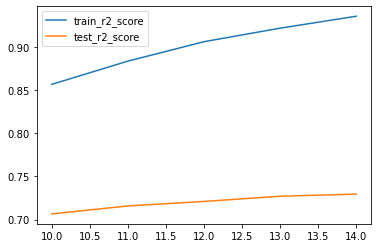

In [38]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_r2_score, label='train_r2_score')
plt.plot(max_depths, test_r2_score, label='test_r2_score')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(1, 20)),
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

RFR = RandomForestRegressor()

# Create a based model
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFR, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2) 

grid_search.fit(X_train, y_train)

grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = cookies[['sugar index', 'bake temp', 'chill time', 'calories', 'grams baking soda', 'bake time', 'butter type', 'chocolate', 'nuts']]
y = cookies['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

RFR = RandomForestRegressor(n_estimators = 1000, max_depth = 110, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, bootstrap=True)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_train)
y_test_pred= RFR.predict(X_test)

print('R2 Score', r2_score(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

**Test Mittwoch (new data set)** 

In [3]:
cookies_test = pd.read_csv('../Data/cookies_lisa_test.csv')
cookies_strict = pd.read_csv('../Data/cookies_strict.csv')
cookies_strict_2 = pd.read_csv('../Data/cookies_strict_2.csv')

In [4]:
cookies_test.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies_test.drop('quality', axis=1)
y = cookies_test['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 10, weights = 'distance')

Knn.fit(X_train_scale, y_train)

y_pred = Knn.predict(X_test_scale)

print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))

In [ ]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies_strict.drop('quality', axis=1)
y = cookies_strict['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 10, weights = 'distance')

Knn.fit(X_train_scale, y_train)

y_pred = Knn.predict(X_test_scale)

print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))

In [ ]:
#with Standard Scaler
from sklearn.neighbors import KNeighborsRegressor

X = cookies_strict_2.drop('quality', axis=1)
y = cookies_strict_2['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#scaling the x values
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 10, weights = 'distance')

Knn.fit(X_train_scale, y_train)

y_pred = Knn.predict(X_test_scale)

print('R2:', round(r2_score(y_test, y_pred), 3))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))

**Third Try**

In [ ]:
'''cookies_test'''

In [13]:
len(cookies_test)

4905

In [19]:
cookies_test.head(3)

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                  0.25          9.5        300        15.0     136.0   
1                  0.23          3.3        520        34.0     113.0   
2                  0.18          1.9        360        33.0     106.0   

   density    pH  grams baking soda  bake time  quality  butter type  weight  \
0  0.99367  8.10               0.44       12.1        8            1    15.2   
1  0.99429  8.16               0.48        8.4        7            1    12.4   
2  0.98746  8.21               0.83       14.0        9            1     9.4   

   chocolate  raisins  oats  nuts  peanut butter  
0          0        1     0     0              0  
1          0        1     0     0              0  
2          1        0     0     1              0

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = cookies_test.drop('quality', axis=1)
y = cookies_test['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1)

RFR = RandomForestRegressor()

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_train)
y_test_pred= RFR.predict(X_test)

print('R2 Score', r2_score(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Cross Validation Score: ', cross_val_score(RFR, X, y, cv=10).mean())

R2 Score 0.7418984395764985
RMSE: 0.6607811830659933
Cross Validation Score:  0.7736227987096806


In [16]:
cvs = cross_val_score(RFR, X, y, cv=10)
cvs

array([0.75522083, 0.73245714, 0.74618535, 0.710783  , 0.69976078,
       0.71698849, 0.70531955, 0.7498384 , 0.73237008, 0.71172018])

In [21]:
r2_score(y_train, y_pred)

0.9686368552192375

In [7]:
quality_pred = RFR.predict(test)
quality_pred

array([7.41354035, 7.95081295, 7.60697973, 8.24531539, 7.87967569,
       7.37036001, 7.84177461, 7.37448161, 8.15136003, 7.87055871,
       7.62823686, 7.55682593, 7.38236458, 7.83906838, 8.34016679,
       7.54453565, 8.55229656, 7.28872381, 8.23099141, 8.18824337,
       7.96578461, 7.94495078, 8.30582932, 7.57517294, 7.34730054,
       7.17923652, 7.47930145, 7.65450567, 7.20251412, 7.65234105,
       8.04416399, 7.9027921 , 7.43903173, 7.95536901, 8.20417728,
       8.01791821, 8.64797081, 8.1929626 , 7.15852677, 7.87747869,
       8.18835778, 7.14217283, 7.98972312, 7.30037533, 7.2615718 ,
       7.49957694, 7.43947456, 8.16149306, 7.78130108, 7.87479671,
       7.21155602, 7.46788555, 7.63495283, 7.99373032, 7.52046227,
       8.22200389, 7.6689251 , 7.57211278, 8.2792367 , 8.73189015,
       7.53059294, 7.7973903 , 7.20204101, 8.27793693, 8.3294598 ,
       7.59706905, 7.53031437, 7.46218152, 7.51461103, 8.39231763,
       8.17310906, 8.43397922, 7.08074211, 7.1098786 , 8.08443

In [8]:
test['quality_pred'] = quality_pred

In [10]:
test.to_csv('../Data/thirdtry_sarahlisa.csv')

In [9]:
test.head()

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                  0.62        19.25      400.0        41.0     172.0   
1                  0.35         1.00      520.0        35.0     146.0   
2                  0.39        10.40      440.0        20.0     142.0   
3                  0.33         1.10      570.0        21.0      82.0   
4                  0.37        13.50      600.0        52.0     192.0   

   density    pH  grams baking soda  bake time  butter type  weight  \
0   1.0002  7.98               0.67        9.7            1    16.6   
1   0.9930  8.45               0.44       10.0            1    13.8   
2   0.9974  8.20               0.53       10.0            1    17.0   
3   0.9910  8.32               0.46       10.9            1    12.4   
4   0.9975  8.00               0.44        9.1            1    14.8   

   chocolate  raisins  oats  nuts  peanut butter  quality_pred  
0          1        0     0     1              0      7.413540  
1          1        0     0     0              0      7.950813  
2          1        0     0     0              0      7.606980  
3          1        0     1     0              0      8.245315  
4          1        0     0     0              0      7.879676

In [12]:
test.head()

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                  0.62        19.25      400.0        41.0     172.0   
1                  0.35         1.00      520.0        35.0     146.0   
2                  0.39        10.40      440.0        20.0     142.0   
3                  0.33         1.10      570.0        21.0      82.0   
4                  0.37        13.50      600.0        52.0     192.0   

   density    pH  grams baking soda  bake time  butter type  weight  \
0   1.0002  7.98               0.67        9.7            1    16.6   
1   0.9930  8.45               0.44       10.0            1    13.8   
2   0.9974  8.20               0.53       10.0            1    17.0   
3   0.9910  8.32               0.46       10.9            1    12.4   
4   0.9975  8.00               0.44        9.1            1    14.8   

   chocolate  raisins  oats  nuts  peanut butter  quality_pred  
0          1        0     0     1              0      7.413540  
1          1        0     0     0              0      7.950813  
2          1        0     0     0              0      7.606980  
3          1        0     1     0              0      8.245315  
4          1        0     0     0              0      7.879676

In [57]:
def performance_metric_2(y_true, y_predict):
    return r2_score(y_true, y_predict)

train_r2_score = []
test_r2_score = []
max_depths = [*range(1, 70, 5)]

#for loop
for k in max_depths:
    RFR = RandomForestRegressor(max_depth=k)
    RFR.fit(X_train, y_train)
    y_predict = RFR.predict(X_train)
    y_test_predict= RFR.predict(X_test)
    train_r2_score.append(performance_metric_2(y_train, y_predict))
    print('k =', k, '\ntrain_r2 =', performance_metric_2(y_train, y_predict))
    test_r2_score.append(r2_score(y_test, y_test_predict))
    print('test_r2 =', r2_score(y_test, y_test_predict))
    print('\n')

k = 1 
train_r2 = 0.5510989762133718
test_r2 = 0.5427784406854335


k = 6 
train_r2 = 0.7505911540732052
test_r2 = 0.7040673033802478


k = 11 
train_r2 = 0.8931429619133826
test_r2 = 0.7379654238784015


k = 16 
train_r2 = 0.955738604062557
test_r2 = 0.7493944981449248


k = 21 
train_r2 = 0.9660555713801449
test_r2 = 0.7495491526102996


k = 26 
train_r2 = 0.9672403585935113
test_r2 = 0.7523688221661528


k = 31 
train_r2 = 0.9675270845574141
test_r2 = 0.752662428210052


k = 36 
train_r2 = 0.9678830622308146
test_r2 = 0.7514623813719702


k = 41 
train_r2 = 0.9669506271785732
test_r2 = 0.7546125275750515


k = 46 
train_r2 = 0.9675677401690127
test_r2 = 0.7569232052671035


k = 51 
train_r2 = 0.967280973464095
test_r2 = 0.7534832322195435


k = 56 
train_r2 = 0.9675382516305311
test_r2 = 0.7499622763181348


k = 61 
train_r2 = 0.96680509750844
test_r2 = 0.7536036523590338


k = 66 
train_r2 = 0.9667978031389527
test_r2 = 0.7519165922482659




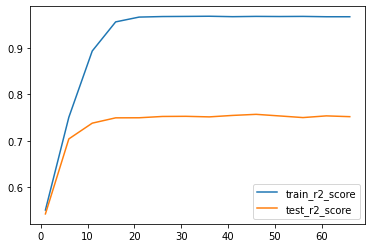

In [58]:
plt.plot(max_depths, train_r2_score, label='train_r2_score')
plt.plot(max_depths, test_r2_score, label='test_r2_score')
plt.legend()
plt.show()